In [84]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
import pandas as pd

In [88]:
import matplotlib

In [89]:
import seaborn as sns

In [90]:
import matplotlib.pyplot as plt

In [91]:
sales_data = pd.read_csv(r"C:\Users\kpooja\Downloads\Dataset MeriSKILL\Sales Data.csv")

In [92]:
sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [93]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Month'] = sales_data['Order Date'].dt.month
monthly_sales = sales_data.groupby('Month')['Sales'].sum()

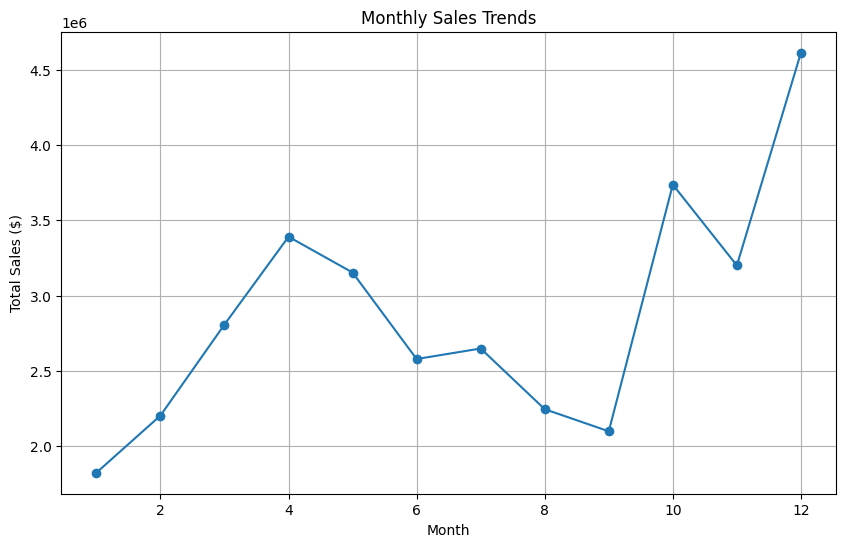

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

In [95]:
top_products = sales_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)
print('\nTop Selling Products:\n', top_products)


Top Selling Products:
 Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


In [98]:
Revenue = sales_data['Sales'].sum()
average_price = sales_data['Price Each'].mean()

totalSales = sales_data['Sales'].sum()
totalCost = sales_data['Price Each'].sum()

pm = ((totalSales-totalCost)/totalSales)*100

sales_QTY =sales_data['Quantity Ordered'].sum() /1000


print('\nRevenue: $', Revenue)
print('Average Price: $', average_price)
print('Sales QTY: {:.2f}k'.format(sales_QTY))
print('Profit Margin: {:.2%}'.format(pm))


Revenue: $ 34492035.97
Average Price: $ 184.3997347674106
Sales QTY: 209.08k
Profit Margin: 58.83%


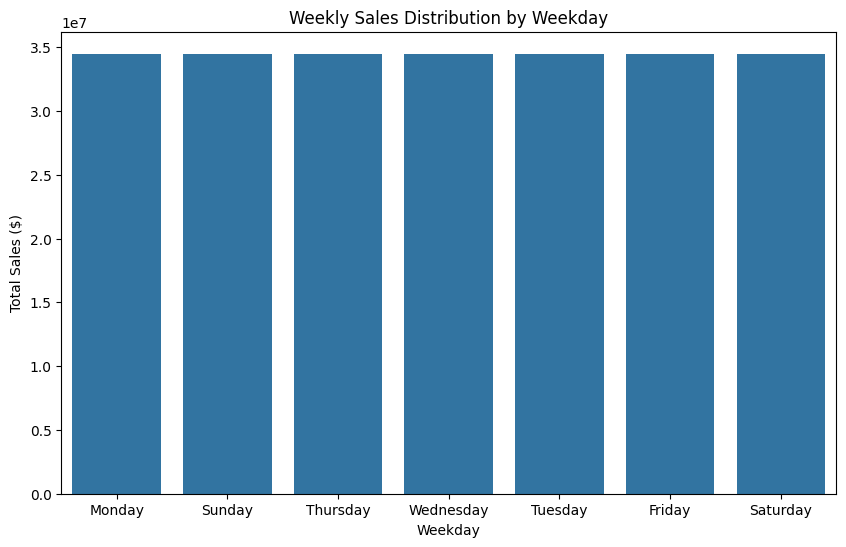

In [105]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

#extracting weekday using order date
weekday = sales_data['Order Date'].dt.day_name()

weekly_sales = weekday.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

Total_sales = sales_data['Sales'].sum()

# Plotting the weekly sales distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday, y=Total_sales)
plt.title('Weekly Sales Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales ($)')
plt.show()